In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uploading Training and Test datasets

train = pd.read_csv("E:\Big Mart Dataset\Train.csv")
test = pd.read_csv("E:\Big Mart Dataset\Test.csv")

In [3]:
# Check the shape of training and test dataframe
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [4]:
# Checking the columns name of training datasets
print("Training data columns",train.columns)

Training data columns Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [5]:
# Checking the columns name of test datasets
print("Testing data columns",test.columns)

Testing data columns Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [6]:
# Check the count of null values in each column in training datasets
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Check the count of null values in each column in test datasets
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
# Checking the training data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# Checking the test data information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### fill the item_weight value with median value in training and testing

In [10]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [11]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [12]:
# Checking the values count in Outlet_Size column
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### fill the outlet_size value with bfill/ffill method in training and testing

In [13]:
train['Outlet_Size'].fillna(method = 'bfill',inplace = True)

In [14]:
test['Outlet_Size'].fillna(method = 'bfill',inplace = True)

In [15]:
# Again check the value counts by filling all the values
train.Outlet_Size.value_counts()

Medium    3940
Small     3290
High      1293
Name: Outlet_Size, dtype: int64

In [16]:
# Again check the value counts by filling all the values of test datasets as well
test.Outlet_Size.value_counts()

Medium    2570
Small     2223
High       885
Name: Outlet_Size, dtype: int64

In [17]:
# Check all the count of unique values in each column in datasets
train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Univariate Analysis

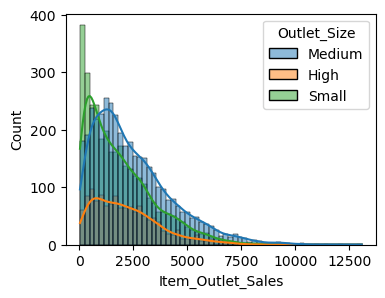

In [18]:
plt.figure(figsize = (4,3))
sns.histplot(x = 'Item_Outlet_Sales',data = train,hue = 'Outlet_Size',kde=True)
plt.show()

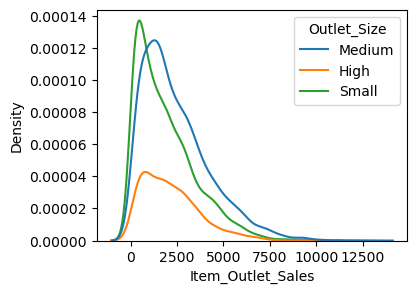

In [19]:
plt.figure(figsize = (4,3))
sns.kdeplot(x = 'Item_Outlet_Sales',data = train,hue = 'Outlet_Size')
plt.show()

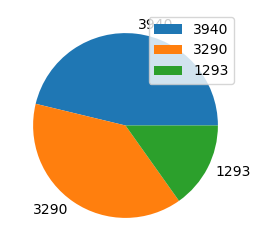

In [20]:
plt.figure(figsize = (4,3))
plt.pie(x = train['Outlet_Size'].value_counts(),labels=train['Outlet_Size'].value_counts())
plt.legend()
plt.show()

# Bivariate Analysis

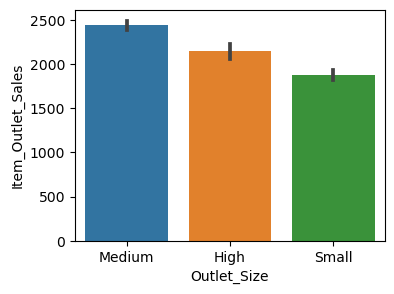

In [21]:
plt.figure(figsize = (4,3))
sns.barplot(x = train['Outlet_Size'],y = train['Item_Outlet_Sales'])
plt.show()

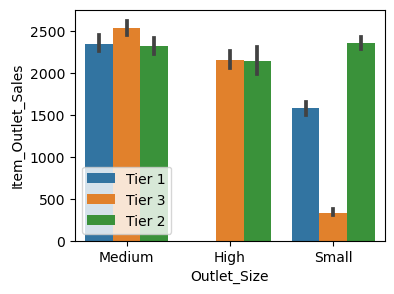

In [22]:
plt.figure(figsize = (4,3))
sns.barplot(x = train['Outlet_Size'],y = train['Item_Outlet_Sales'],hue = train['Outlet_Location_Type'])
plt.legend(loc = 'best')
plt.show()

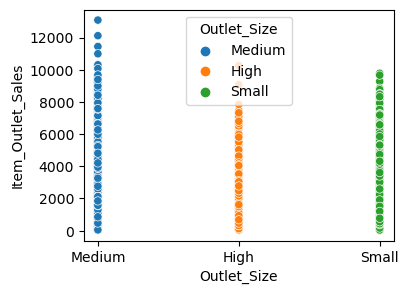

In [23]:
plt.figure(figsize = (4,3))
sns.scatterplot(y = train['Item_Outlet_Sales'],x = train['Outlet_Size'],hue = train['Outlet_Size'])
plt.show()

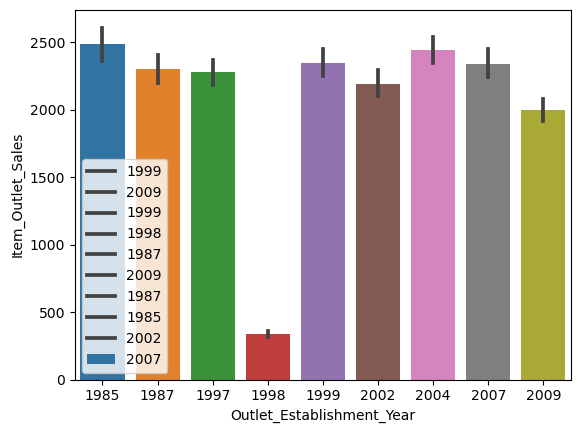

In [24]:
#Outlet_Establishment_Year
sns.barplot(x = train['Outlet_Establishment_Year'],
            y = train['Item_Outlet_Sales'])
plt.legend(train['Outlet_Establishment_Year'],)
plt.show()

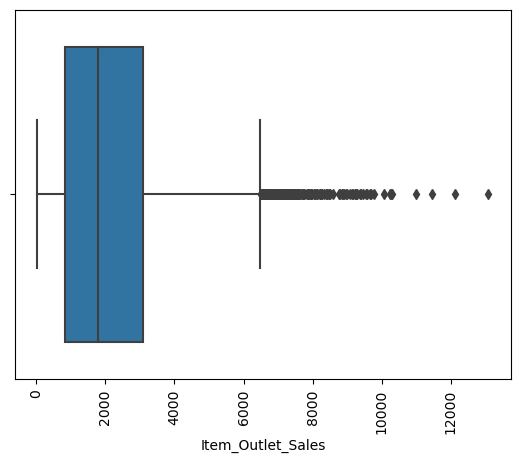

In [25]:
sns.boxplot(x = train['Item_Outlet_Sales'])
plt.xticks(rotation  = 90)
plt.show()

In [26]:
percentile25 = train['Item_Outlet_Sales'].quantile(0.25)
percentile75 = train['Item_Outlet_Sales'].quantile(0.75)

In [27]:
iqr = percentile75 - percentile25

In [28]:
upper_limit = percentile75+1.5*iqr
lower_limit = percentile25-1.5*iqr

In [29]:
train[train['Item_Outlet_Sales']>upper_limit]
train[train['Item_Outlet_Sales']<lower_limit]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [30]:
new_train = train[train['Item_Outlet_Sales']<upper_limit]

In [31]:
new_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<Axes: xlabel='Item_Outlet_Sales'>

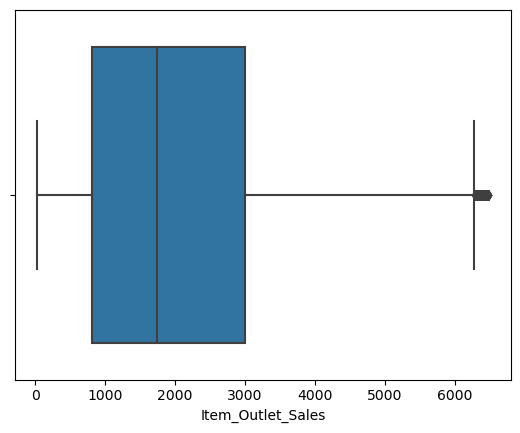

In [32]:
sns.boxplot(x = new_train['Item_Outlet_Sales'])

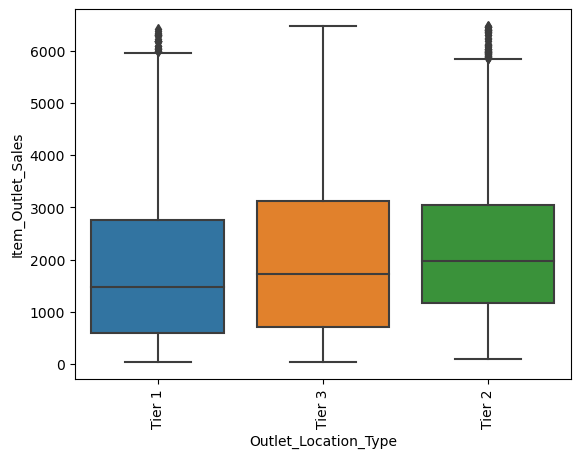

In [33]:
sns.boxplot(x = new_train['Outlet_Location_Type'], y = new_train['Item_Outlet_Sales'])
plt.xticks(rotation  = 90)
plt.show()

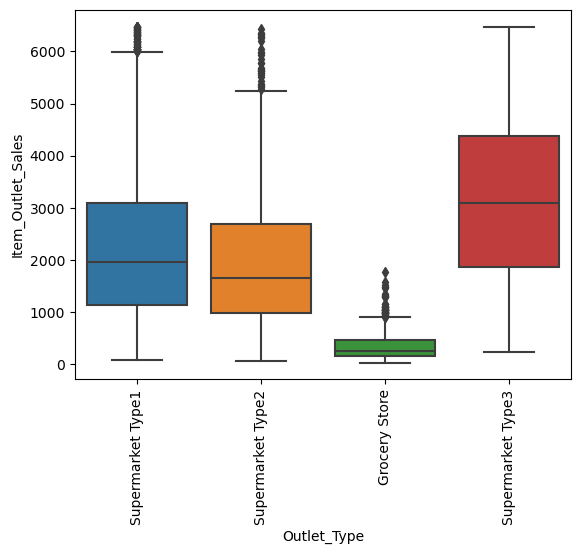

In [34]:
sns.boxplot(x = new_train['Outlet_Type'], y = new_train['Item_Outlet_Sales'])
plt.xticks(rotation  = 90)
plt.show()

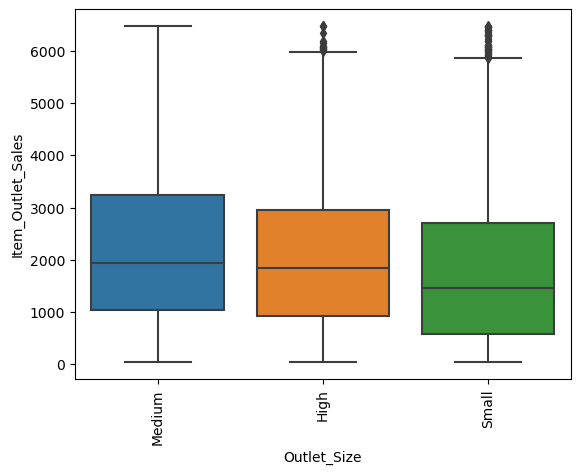

In [35]:
sns.boxplot(x = new_train['Outlet_Size'], y = new_train['Item_Outlet_Sales'])
plt.xticks(rotation  = 90)
plt.show()

In [36]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   object 
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   object 
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   object 
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   object 
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   object 
 9   Outlet_Location_Type       8337 non-null   object 
 10  Outlet_Type                8337 non-null   object 
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 846.7+ KB


# Feature Encoding

In [37]:
# Convert all the categorical columns to numerical by label Encoding

cat_columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()
new_train[cat_columns] = new_train[cat_columns].apply(lab_en.fit_transform)

In [38]:
new_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [39]:
new_train.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7715
Item_Type                      16
Item_MRP                     5832
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3322
dtype: int64

In [40]:
new_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Splitting train and test data

In [41]:
x = new_train.iloc[:,:-1].values
y = new_train.iloc[:,-1].values

In [42]:
x.shape

(8337, 11)

In [43]:
y.shape

(8337,)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

In [45]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5835, 11) (2502, 11) (5835,) (2502,)


In [46]:
# from sklearn.preprocessing import StandardScaler
# s_scale = StandardScaler()
# x_train = s_scale.fit(x_train)
# x_test = s_scale.fit_transform(x_test)

In [47]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = lr_model.predict(x_test)

In [49]:
y_pred

array([3827.17990895, 2993.81568324, 2596.90282134, ..., 4499.57147174,
       1081.20569048, 1505.61780564])

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4802189922344139

# RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
rfc_pred = rfc.predict(x_test)

In [53]:
rfc_pred

array([2530.40619 , 2959.034914, 1882.895716, ..., 4224.307918,
        815.951216, 1564.443576])

In [54]:
r2_score(y_test,rfc_pred)

0.527614026589718

In [55]:
#pip install xgboost

# XGBoost

In [56]:
import xgboost as xg
xgboost = xg.XGBRegressor(n_estimators = 10,objective='reg:linear')
xgboost.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [57]:
xg_pred = xgboost.predict(x_test)

In [58]:
r2_score(y_test,xg_pred)

0.5622194052211915